### 1. 네이버 주식 데이터 크롤링
- 웹 서비스 분석하기(URL 분석)
- request, response하기( json 얻기)
- 문자열 json데이터를 dict로 변셩(파싱)후 데이터 프레임으로 생성


In [1]:
import requests


In [21]:
url= "https://m.stock.naver.com/api/json/world/worldIndexDay.nhn?symbol=LNS@FTSE100&pageSize=20&page=3"


In [22]:
response= requests.get(url)
response

<Response [200]>

In [34]:
datas= response.json()["result"]["worldIndexDay"]
datas[:1]

[{'cd': 'SHS@000001',
  'dt': '20190807',
  'nv': 2789.02,
  'hv': 2792.69,
  'lv': 2768.68,
  'ncv': 2768.68,
  'cv': -8.876,
  'cr': -0.32}]

In [24]:
london_df= pd.DataFrame(datas)

In [25]:
london_df.tail()

,cd,cr,cv,dt,hv,lv,ncv,nv
15,LNS@FTSE100,1.11,78.97,20190821,7215.53,7122.12,7203.97,7125.00
16,LNS@FTSE100,-0.90,-64.65,20190820,7231.65,7121.24,7125.00,7189.65
17,LNS@FTSE100,1.02,72.50,20190819,7214.23,7117.15,7189.65,7117.15
18,LNS@FTSE100,0.71,50.14,20190816,7125.90,7067.01,7117.15,7067.01
19,LNS@FTSE100,-1.13,-80.87,20190815,7148.75,7020.22,7067.01,7147.88


In [37]:
url='https://m.stock.naver.com/api/json/world/worldIndexDay.nhn?symbol=NAS@IXIC&pageSize=20&page=3'
response= requests.get(url)
datas= response.json()["result"]["worldIndexDay"]
datas

usa_df=pd.DataFrame(datas)
usa_df.tail()

,cd,cr,cv,dt,hv,lv,ncv,nv
15,NAS@IXIC,-0.68,-54.25,20190820,8010.58,7948.09,7948.56,7989.36
16,NAS@IXIC,1.35,106.82,20190819,8026.75,7974.36,8002.81,8006.18
17,NAS@IXIC,1.67,129.38,20190816,7907.52,7828.35,7895.99,7828.35
18,NAS@IXIC,-0.09,-7.32,20190815,7805.93,7716.56,7766.62,7790.20
19,NAS@IXIC,-3.02,-242.42,20190814,7900.28,7762.87,7773.94,7877.33


In [36]:
url='https://m.stock.naver.com/api/json/world/worldIndexDay.nhn?symbol=SHS@000001&pageSize=20&page=3'
response= requests.get(url)
datas= response.json()["result"]["worldIndexDay"]
datas

china_df=pd.DataFrame(datas)
china_df.tail()

,cd,cr,cv,dt,hv,lv,ncv,nv
15,SHS@000001,0.42,11.655,20190814,2829.89,2807.72,2808.92,2824.49
16,SHS@000001,-0.63,-17.735,20190813,2802.04,2790.61,2797.26,2798.05
17,SHS@000001,1.45,40.242,20190812,2815.00,2776.62,2815.00,2781.98
18,SHS@000001,-0.71,-19.799,20190809,2808.33,2770.48,2774.75,2805.59
19,SHS@000001,0.93,25.872,20190808,2799.69,2782.25,2794.55,2784.18


In [38]:
len(london_df), len(china_df), len(usa_df)

(20, 20, 20)

#### 그래프로 그리기

In [10]:
%matplotlib inline

In [11]:
%config inlineBackend.figure_formats={'png','retina'}

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [39]:
london_df.tail()

,cd,cr,cv,dt,hv,lv,ncv,nv
15,LNS@FTSE100,1.11,78.97,20190821,7215.53,7122.12,7203.97,7125.00
16,LNS@FTSE100,-0.90,-64.65,20190820,7231.65,7121.24,7125.00,7189.65
17,LNS@FTSE100,1.02,72.50,20190819,7214.23,7117.15,7189.65,7117.15
18,LNS@FTSE100,0.71,50.14,20190816,7125.90,7067.01,7117.15,7067.01
19,LNS@FTSE100,-1.13,-80.87,20190815,7148.75,7020.22,7067.01,7147.88


In [40]:
japan_df['ncv'][:3]

0    21085.94
1    20649.14
2    20625.16
Name: ncv, dtype: float64

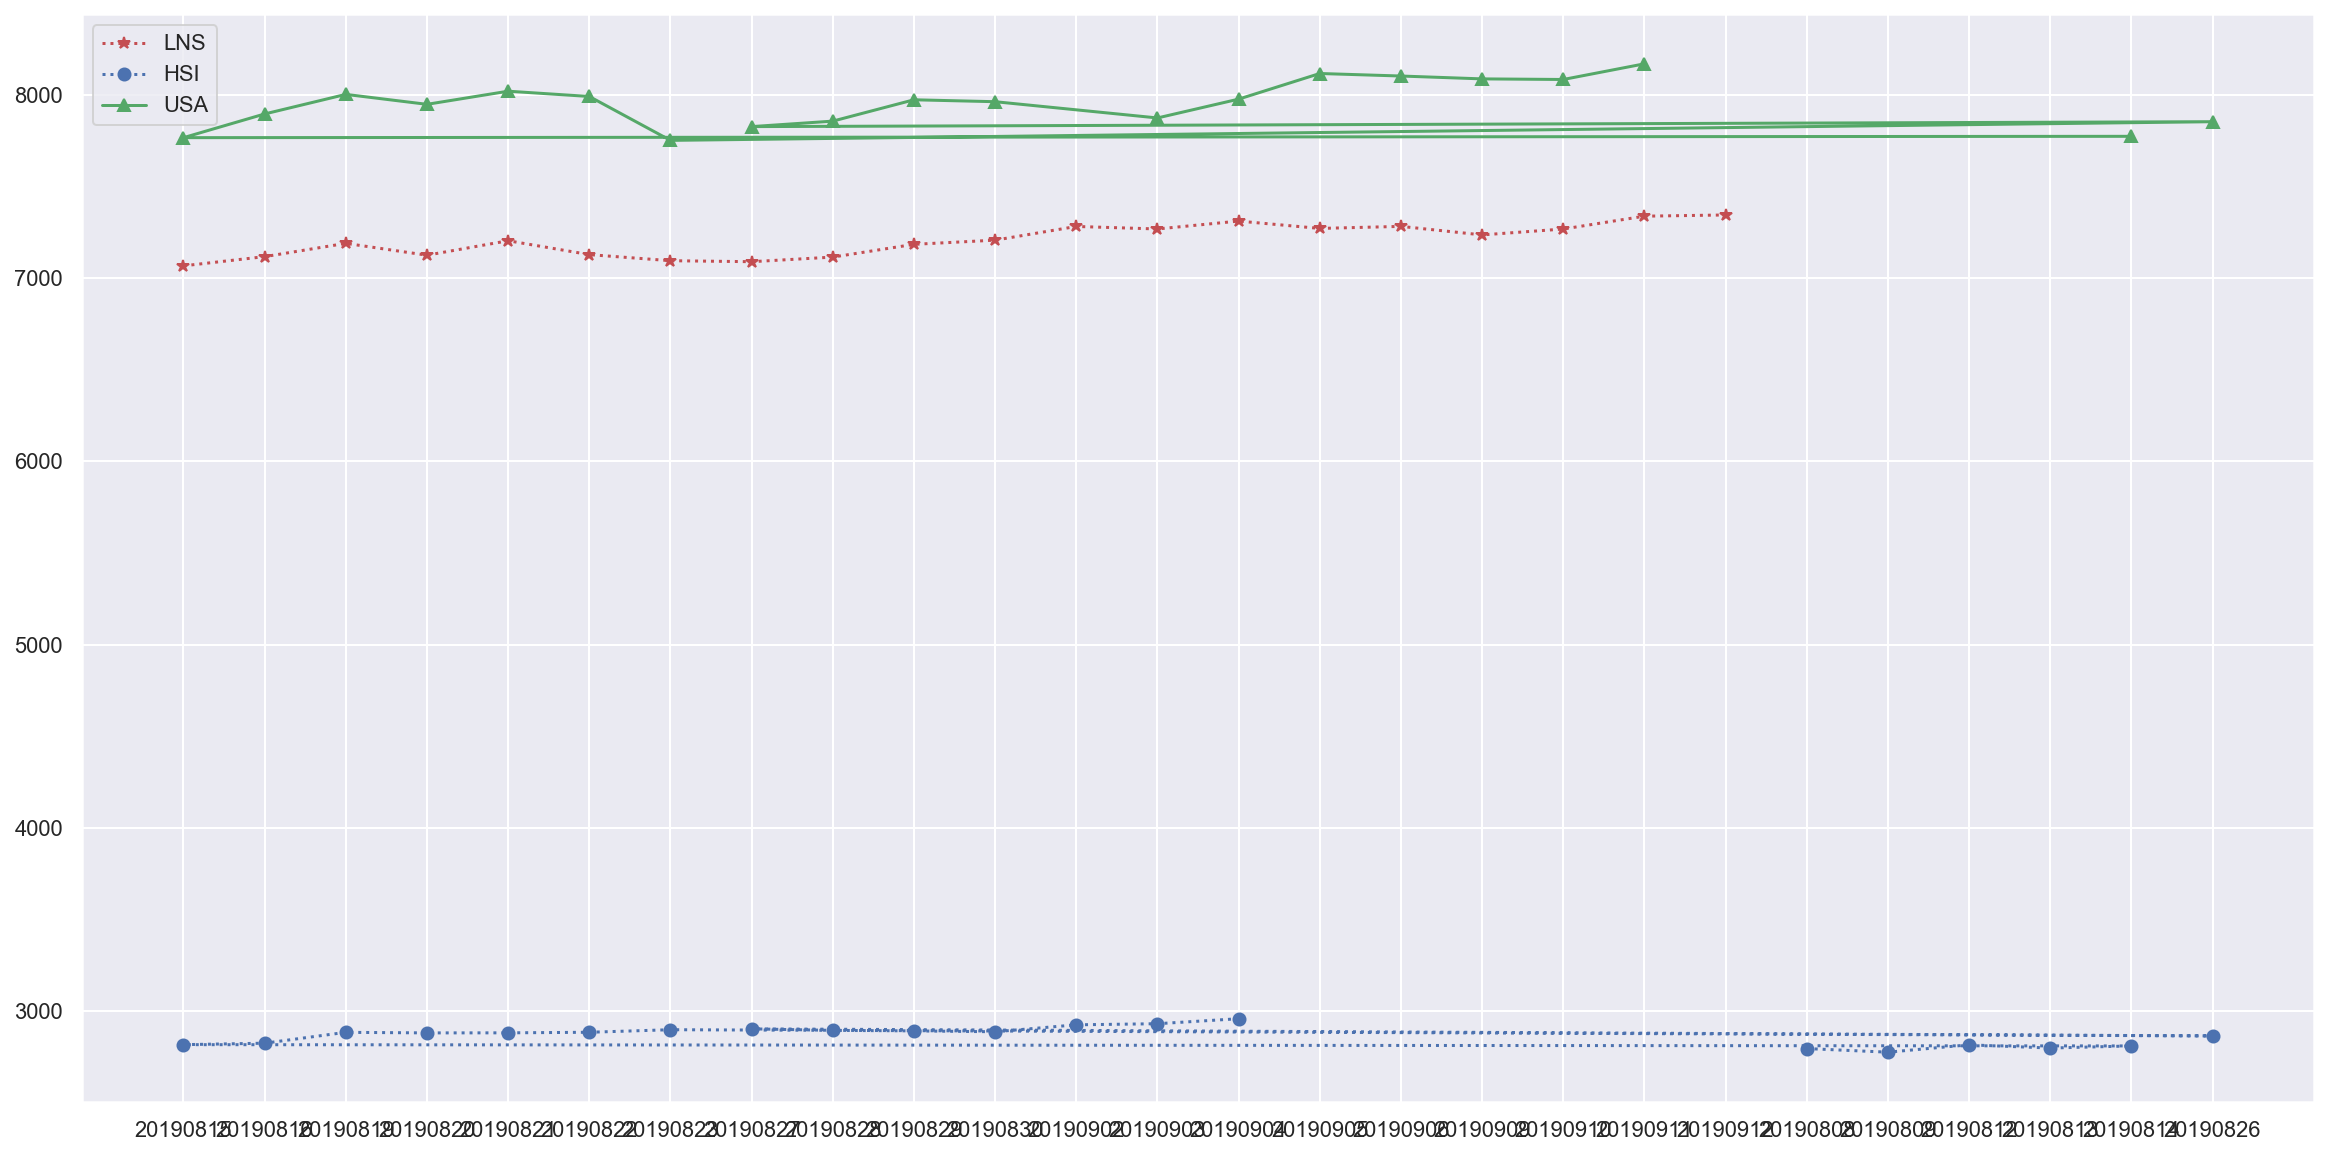

In [49]:
plt.figure(figsize=(20,10))

plt.plot(london_df[::-1]["dt"],london_df[::-1]["ncv"], "r:*", label="LNS" )
plt.plot(china_df[::-1]["dt"],china_df[::-1]["ncv"], "b:o", label="HSI" )
plt.plot(usa_df[::-1]["dt"],usa_df[::-1]["ncv"], "g-^", label="USA" )
plt.legend(loc=0)
plt.show()

### 정규화(Nomalization)
- z=(x-min(x)/(max(x)-min(X))

In [50]:
from sklearn import preprocessing


In [51]:
#정규화해주는 함수
#preprocessing.minmax_scale()


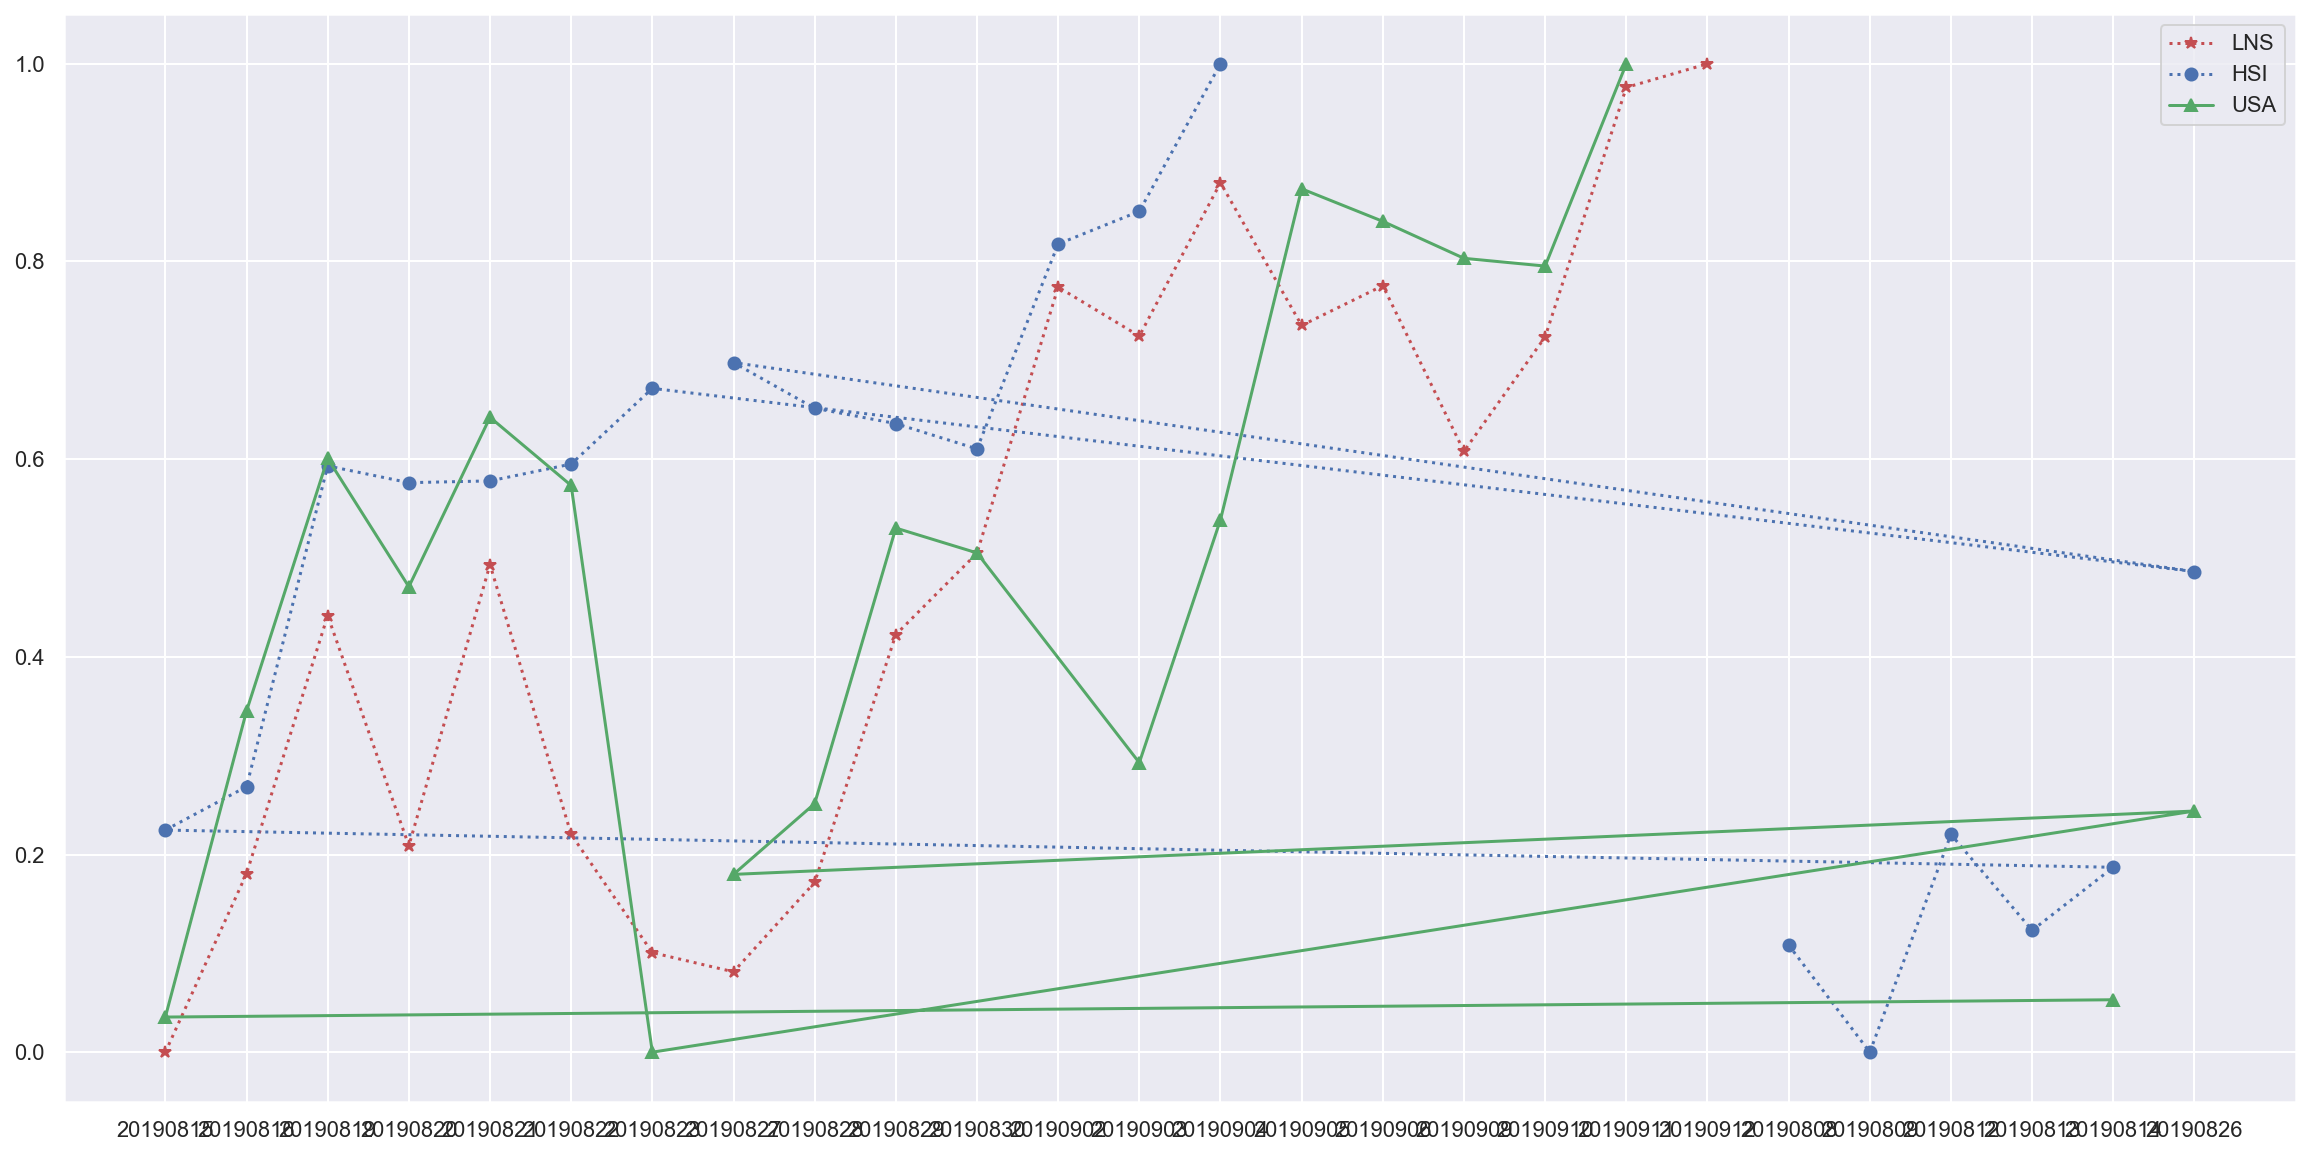

In [53]:
plt.figure(figsize=(20,10))

plt.plot(london_df[::-1]["dt"],preprocessing.minmax_scale(london_df[::-1]["ncv"]), "r:*", label="LNS" )
plt.plot(china_df[::-1]["dt"],preprocessing.minmax_scale(china_df[::-1]["ncv"]), "b:o", label="HSI" )
plt.plot(usa_df[::-1]["dt"],preprocessing.minmax_scale(usa_df[::-1]["ncv"]), "g-^", label="USA" )
plt.legend(loc=0)
plt.show()

In [19]:
# 상관계수 구하기


In [56]:
np.corrcoef(london_df["ncv"], china_df["ncv"])[0,1]

0.7604301395466042

In [57]:
np.corrcoef(usa_df["ncv"], china_df["ncv"])[0,1]

0.48118740870865234

In [58]:
np.corrcoef(usa_df["ncv"], london_df["ncv"])[0,1]

0.6365718512900655

### 2. 지역별 날씨 데이터 가져오기

In [59]:
import requests
KEY= ''
lat, lng = 37.8267, 122.4233

In [ ]:
url= "https://api.darksky.net/forecast/{}/{},{}".format(KEY, lat, lng)
url

In [61]:
response = requests.get(url)
response

<Response [200]>

In [72]:
data= response.json()
data["timezone"],data["hourly"]["summary"]

('Asia/Shanghai', 'Partly cloudy throughout the day.')

In [75]:
def forecast(lat, lng):
    url= "https://api.darksky.net/forecast/{}/{},{}".format(KEY, lat, lng)
    response = requests.get(url)
    data= response.json()
    return data["timezone"],data["hourly"]["summary"]

In [76]:
forecast(35,122)

('Asia/Shanghai', 'Clear throughout the day.')

### 슬랙봇에 날씨 정보 날리기

In [77]:
import requests
import json

In [78]:
#내 슬랙 워크스페이스 주소
url = ""

In [83]:
#전송할 메세지에 대한 내용
payload = {
    "channel": "",
    "username" : "Slack_bot",
    "text" : "날씨정보입니다 {}".format(forecast(15,122))
}

In [84]:
response = requests.post(
    url,
    data=json.dumps(payload)
)
response

<Response [200]>